# exception logs 


In [94]:
import os
import sys
import pandas as pd
import numpy as np
import json
import re
from IPython.display import HTML, Markdown
import watermark
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [95]:
%watermark -n -v -m -g -iv


watermark  2.0.2
json       2.0.9
pandas     1.0.3
matplotlib 3.2.1
re         2.2.1
numpy      1.18.2
Mon Apr 13 2020 

CPython 3.7.4
IPython 7.13.0

compiler   : MSC v.1916 32 bit (Intel)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 6
interpreter: 32bit
Git hash   : 2976116eaede593c76a14ae93573ab5433d961e2


In [96]:
stats = pd.read_csv('./../A001_stats.csv')
stats["99%"] = pd.to_numeric(stats["99%"])

In [97]:
# ten worst
sort_df = stats.sort_values(by=['99%'], inplace=False, ascending=False)
sort_df.head(10)


,Type,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999,100%
0,POST,/sourceItems,79640,0,62,101,5,4144,2,126.75,...,100,120,190,290,510,770,3200,4100,4100,4100
1,None,Aggregated,79640,0,62,101,5,4144,2,126.75,...,100,120,190,290,510,770,3200,4100,4100,4100


In [98]:
stats.tail()

,Type,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999,100%
0,POST,/sourceItems,79640,0,62,101,5,4144,2,126.75,...,100,120,190,290,510,770,3200,4100,4100,4100
1,None,Aggregated,79640,0,62,101,5,4144,2,126.75,...,100,120,190,290,510,770,3200,4100,4100,4100


In [99]:
stats = pd.read_csv('./../A002_stats.csv')
stats["99%"] = pd.to_numeric(stats["99%"])
sort_df = stats.sort_values(by=['99%'], inplace=False, ascending=False)
sort_df.head(10)


,Type,Name,# requests,# failures,Median response time,Average response time,Min response time,Max response time,Average Content Size,Requests/s,...,75%,80%,90%,95%,98%,99%,99.9%,99.99%,99.999,100%
4,GET,/products/2/reports/daily/services/series?star...,60,0,157000,155227,119128,181550,151513,0.10,...,166000,168000,171000,175000,181000,182000,182000,182000,182000,182000
8,None,Aggregated,556,0,400,18945,3,181550,20402,0.94,...,4600,8400,135000,159000,168000,171000,182000,182000,182000,182000
2,GET,/features?productId=2&start=2020-02-01T19:52:4...,60,0,10000,11405,2193,26453,4017,0.10,...,16000,17000,19000,23000,24000,26000,26000,26000,26000,26000
6,GET,/services?productId=2&start=2020-02-01T19:52:4...,60,0,3600,6591,2067,24609,10322,0.10,...,7400,12000,19000,20000,21000,25000,25000,25000,25000,25000
0,GET,/customers,79,0,200,330,4,3767,972,0.13,...,280,320,610,1200,2000,3800,3800,3800,3800,3800
1,GET,/customers/1,79,0,240,335,7,1904,952,0.13,...,320,400,830,1200,1500,1900,1900,1900,1900,1900
5,GET,/products?customerId=1,79,0,200,286,3,1618,599,0.13,...,270,310,570,1200,1400,1600,1600,1600,1600,1600
3,GET,/products/2,79,0,280,351,14,1453,10332,0.13,...,390,450,870,1000,1100,1500,1500,1500,1500,1500
7,GET,/sources?productId=2&start=2020-02-01T19:52:41...,60,0,530,622,183,1466,6286,0.10,...,770,920,1300,1300,1300,1500,1500,1500,1500,1500


In [85]:
data = list()
for root, subdirs, files in os.walk("C://logs"):
    for filename in files:
        file_path = os.path.join(root, filename)
        size_path = os.path.getsize(file_path)
        print('\t- file %s (full path: %s) %s' % (filename, file_path, size_path))

        
        data_id = 0
        with open(file_path, 'r', encoding="utf-8") as f:
            data_id += 1
            lines = f.readlines()
            for l in lines:
                try:
                    d = json.loads(l)
                    if d["Level"] == "Error":
                        temp = list()
                        temp.append(data_id)
                        temp.append(d["Timestamp"])
                        temp.append(d["MessageTemplate"])
                        temp.append(d.get("Exception"))
                        temp.append(d["Properties"].get("elapsed"))
                        temp.append(d["Properties"]["EventId"].get("Name"))                    
                        data.append(temp)
                except:
                    print(l)                                    

df = pd.DataFrame(data, columns=['Id', 'Timestamp', 'MessageTemplate',  'Exception', 'Elapsed', "EventName"])
# df['MessageTemplate'] = df['MessageTemplate'].str.encode('utf-8')
df["Elapsed"] = pd.to_numeric(df["Elapsed"])
df["Timestamp"] = pd.to_datetime(df["Timestamp"])        
print(df.count())
df.info()


	- file log2020041320.log (full path: C://logs\logs\log2020041320.log) 17584
Id                 5
Timestamp          5
MessageTemplate    5
Exception          5
Elapsed            0
EventName          5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Id               5 non-null      int64              
 1   Timestamp        5 non-null      datetime64[ns, UTC]
 2   MessageTemplate  5 non-null      object             
 3   Exception        5 non-null      object             
 4   Elapsed          0 non-null      float64            
 5   EventName        5 non-null      object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 244.0+ bytes


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2020-04-13 20:38:26.245963900+00:00 to 2020-04-13 20:38:26.245918900+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Elapsed  0 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


Text(0, 0.5, 'Elapsed')

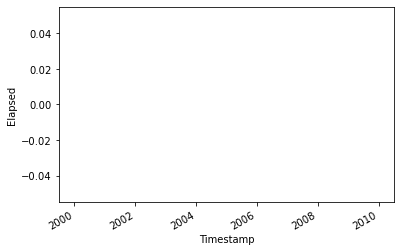

In [86]:

time_series = df[["Timestamp", "Elapsed"]]
time_series.set_index("Timestamp", inplace=True)
time_series.info()
                 
time_series.plot(legend=False)
plt.gca().set_ylabel(r'Elapsed')


In [64]:
messages = df.groupby('MessageTemplate')
messages.count()[['Exception', 'Id']]

,Exception,Id
MessageTemplate,,
An unhandled exception has occurred while executing the request.,5,5


In [45]:

for name, group in df.groupby('Exception'):
    display('Count:' + str(int(group.count()[['Id']])))
    display(group['MessageTemplate'].unique())        
    
    temp_lines = re.split('\n', name)
    for temp_line in temp_lines:
        if 'Owlvey' in temp_line:
            display(temp_line)
        
    display(name)
    
    #for item in messages.groups.keys():        
    
    #exceptions = df[df['MessageTemplate'] == item].groupby('')        
    # exceptions = df[df['MessageTemplate'].str.contains(item)]    
    
    # display(exceptions.groupby('Exception').count()[['Id']])


'Count:5'

array(['An unhandled exception has occurred while executing the request.'],
      dtype=object)

'Microsoft.AspNetCore.Server.Kestrel.Core.BadHttpRequestException: Unexpected end of request content.\n   at Microsoft.AspNetCore.Server.Kestrel.Core.BadHttpRequestException.Throw(RequestRejectionReason reason)\n   at Microsoft.AspNetCore.Server.Kestrel.Core.Internal.Http.Http1ContentLengthMessageBody.ReadAsyncInternal(CancellationToken cancellationToken)\n   at Microsoft.AspNetCore.Server.Kestrel.Core.Internal.Http.HttpRequestStream.ReadAsyncInternal(Memory`1 buffer, CancellationToken cancellationToken)\n   at System.Text.Json.JsonSerializer.ReadAsync[TValue](Stream utf8Json, Type returnType, JsonSerializerOptions options, CancellationToken cancellationToken)\n   at Microsoft.AspNetCore.Mvc.Formatters.SystemTextJsonInputFormatter.ReadRequestBodyAsync(InputFormatterContext context, Encoding encoding)\n   at Microsoft.AspNetCore.Mvc.Formatters.SystemTextJsonInputFormatter.ReadRequestBodyAsync(InputFormatterContext context, Encoding encoding)\n   at Microsoft.AspNetCore.Mvc.ModelBinding.